# Regresión logística y descenso del gradiente en Python

<img src= https://www.cs.us.es/~fsancho/images/2017-02/gds.gif>

#### Autor: Ignacio Ruiz de Zuazu Echevarría
#### Universidad de CUNEF
#### 23 de octubre de 2020

## Tabla de contenidos

* [1. Objetivo del trabajo](#Objetivo-del-trabajo) 
* [2. Dataset y variables](#Dataset-y-variables) 
* [3. Metodología](#Metodología)
* [4. Análisis Exploratorio](#Análisis-Exploratorio)
   * [4.1 Análisis Descriptivo](#Análisis-Descriptivo)
   * [4.2 Histogramas](#Histogramas)
   * [4.3 Matriz de correlación](#Matriz-de-correlación)
* [5.Regresión logistica y función de gradientes](#Regresión-logistica-y-función-de-gradientes)
   * [5.1 Función de coste](#Función-de-coste)
   * [5.2 Coste y gradiente 0](#Coste-y-gradiente-0)
   * [5.3 Función del descenso de gradientes](#Función-del-descenso-de-gradientes)
   * [5.4 Gráficas del descenso de gradientes](#Gráficas-del-descenso-de-gradientes)
* [6.Referencias](#Referencias)

## Objetivo del trabajo

Como objetivo principal en este trabajo es el estudio al detalle de la regresión logística y el descenso de gradiente en Python. Teniendo en cuenta la programación del descenso del mismo en base al archivo de datos proporcionado anteriormente en clase. Dicho estudio incluirá un análisis descriptivo con su correspondiente matriz de correlación, regresión logística y función de gradientes que se divirá en cuatro apartados: función de coste, coste y gradiente 0, función del descfenso de gradientes. Finalizando con unas gráficas representativas a lo estudiado en este análisis del descenso de gradiente.

## Dataset y variables

El Dataset con el que se va a estudiar contiene 3 variables:

* score-1: Nota del examen 1
* score-2: Nota del examen 2
* label: toma el valor 1 si se han aprobado los dos exámenes y 0 si se ha suspendido al menos un examen

## Librerías que se van a emplear en el trabajo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

### Dataset

In [4]:
datos = pd.read_csv("./data/01_raw.csv")
datos.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [14]:
datos.tail()

,score_1,score_2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


Se renombran algunas de las variables con el fin de facilitar el trabajo.

In [6]:
datos = datos.rename(columns = {'score-1':'score_1','score-2':'score_2'})

## Metodología

Para el análisis exploratorio se va a tratar de, en primer lugar, observar las características de este Dataset para ver de que tipo es cada variable y si existen valores NaN que puedan comprometer este estudio. Seguidamente, mediante histogramas y cálculo numérico se evaluará desde un enfoque global los resultados de las puntuaciones. En cuanto al principal objetivo del trabajo, se definirán las distintas funciones como la regresión logística, la función de coste y la función del descenso de gradientes para conseguir una simulación del descenso de gradientes dado theta y ver su coste.

## Análisis Exploratorio

### Análisis Descriptivo

In [7]:
datos.shape

(100, 3)

In [8]:
pd.DataFrame(list(datos) ,columns = ['Columnas'])

,Columnas
0,score_1
1,score_2
2,label


In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score_1  100 non-null    float64
 1   score_2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Todos los datos son de tipo numérico.

In [10]:
datos.describe() 

,score_1,score_2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [11]:
pd.DataFrame(datos.isna().sum(), columns = ['Valores NaN'])

,Valores NaN
score_1,0
score_2,0
label,0


No se observan valores perdidos en el dataframe.

In [10]:
datos.to_csv('./data/02_intermidiate.csv')

### Histogramas 

<AxesSubplot:xlabel='label', ylabel='Count'>

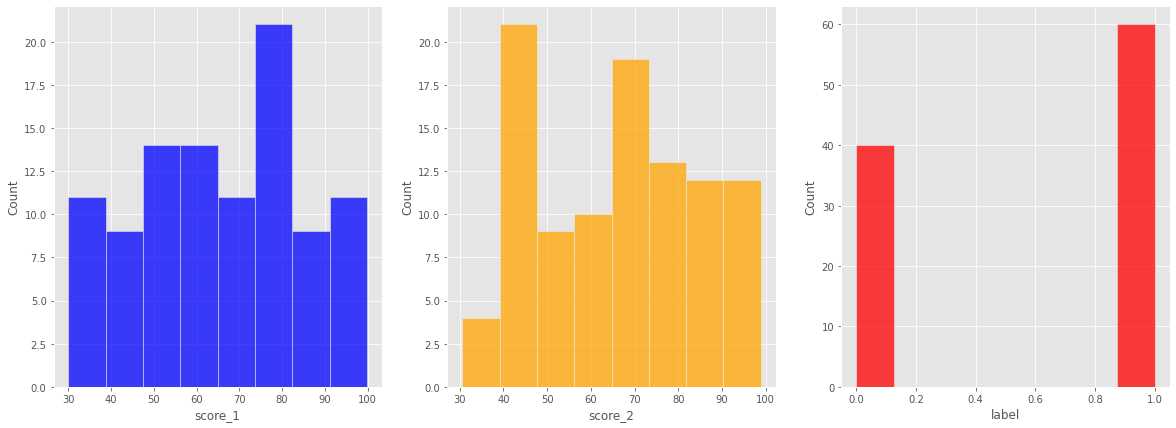

In [12]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,7))
sns.histplot(datos, ax=ax1, x="score_1", color = 'blue')
sns.histplot(datos, ax=ax2, x="score_2", color = 'orange')
sns.histplot(datos, ax=ax3, x="label", color = 'red')

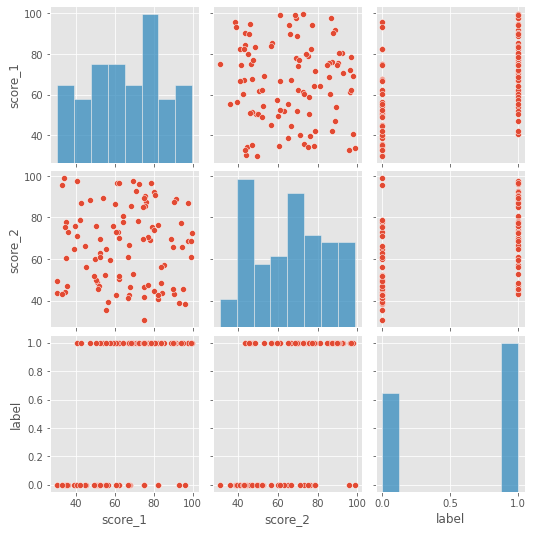

In [13]:
sns.pairplot(data = datos, vars=['score_1','score_2','label'])
plt.show()

### Matriz de correlación

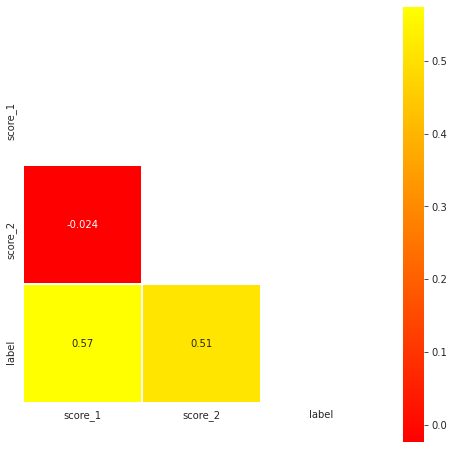

In [11]:
corr = datos.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

Se observa una correlación negativa entre la nota del test 1 y la nota del test 2 mientras que la correlación entre la puntuación uno y la segunda es positiva con el resultado del examen.

## Regresión logistica y función de gradientes

Primero dividimos la tabla en dos. Una que nos muestre unicamente los resulatdos con las puntuaciones y otra con el resultado

In [12]:
puntuaciones = datos[['score_1', 'score_2']].values
resultado = datos['label'].values

Primero se va a definir la función logística  $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [13]:
def logistic_function(x):    
    return 1/ (1 + np.exp(-x))

A continuación se va a definir la función de coste para una regresión logística donde el objetivo es minimizar el coste

### Función de coste

El objetivo de la función de coste es minimizar el coste. 

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Donde el coste de la función del gradiente viene dado por la derivada parcial de la anterior como se comentaba anteriormente.

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Donde m es el número de observaciones. Se parte de un vector Theta aleatorio y se predice h (Theta)

In [14]:
def funcion_de_coste(theta, x, y):
    m = len(y) # numero de observaciones
    y_pred = logistic_function(np.dot(x , theta)) 
    # Devuelve una matriz fruto del producto de X y theta empleando la regresión logística
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) # término error
    cost = -1 / m * sum(error) # función del coste para theta
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y)) # la formula que representa el coste de la función del gradiente
    return cost[0] , gradient # devuelve el resultado de la función coste y del gradiente

### Coste y gradiente 0 

In [15]:
media_puntuaciones = np.mean(puntuaciones, axis=0)
desv_tipica_puntuaciones = np.std(puntuaciones, axis=0)
puntuaciones_estandarizadas = (puntuaciones - media_puntuaciones) / desv_tipica_puntuaciones # Estandardizacion

filas = puntuaciones_estandarizadas.shape[0] # numero de filas
columnas = puntuaciones_estandarizadas.shape[1] # numero de columnas

X = np.append(np.ones((filas, 1)), puntuaciones_estandarizadas, axis=1) # Matriz de las filas + una nueva columna de 1 (filas con 1)
y = resultado.reshape(filas, 1) # vector de label

theta_0 = np.zeros((columnas + 1, 1)) # matriz de thetas segun el numero de variables (con valor 0)
coste, gradiente = funcion_de_coste(theta_0, X, y) # se obtiene el coste para theta = 0 y los gradientes

print("Cost at initialization", coste)
print("Gradient at initialization:", gradiente)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Función del descenso de gradientes

Para calcular el descenso de gradientes se deriva el coste usando la ecuación anterior que significa Error cuadrático medio (MSE). El objetivo es minimizar el coste para conocer nuestra proxima theta. La derivada parcial nos sirve para encontrar el Theta para la próxima iteración. Aquí también interviene el parámetro alpha que es la tasa de aprendizaje que nos marca el tamaño de los pasos en cada dirección.

In [16]:
def funcion_descenso_gradiente(X, y, theta, tasa_de_aprendizaje, iteraciones):
    costes = [] # coste para cada iteracion
    for i in range(iteraciones): # para cada iteracion
        coste, gradiente = funcion_de_coste(theta, X, y) # calcula su coste y matriz theta 
        theta -= (tasa_de_aprendizaje * gradiente) 
        # la nueva matriz theta cpn cada iteración vendrá dada por el producto entre el gradiente y la tasa de aprendizaje
        costes.append(coste) # agrega los elementos de coste a costes
    return theta, costes 

## Gráficas del descenso de gradientes

### Con 100 iteraciones y learning rate = 0.02

[[0.15924712]
 [0.44929828]
 [0.40142668]]
0.49724288856577725


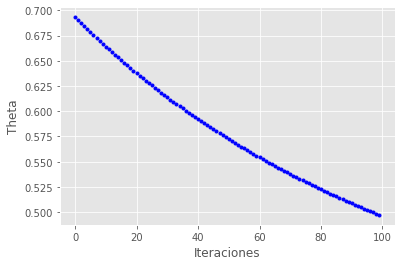

In [17]:
learning_rate = 0.02 # ratio de aprendizaje
numero_de_iteraciones = 100
X = np.append(np.ones((filas, 1)), puntuaciones_estandarizadas, axis=1) 
y = resultado.reshape(filas, 1)

theta_0 = np.zeros((columnas + 1, 1))

theta, costes = funcion_descenso_gradiente(X, y, theta_0, learning_rate, numero_de_iteraciones)

print(theta)
print(costes[-1])

plt.plot(costes, 'b.')
plt.xlabel("Número de iteraciones")
plt.ylabel("Theta");

### Con 100 iteraciones y learning rate = 1

[[1.27738106]
 [3.06129133]
 [2.82508236]]
0.21043453277926896


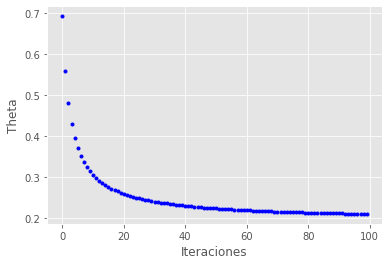

In [18]:
learning_rate = 1 # ratio de aprendizaje
numero_de_iteraciones = 100
X = np.append(np.ones((filas, 1)), puntuaciones_estandarizadas, axis=1) 
y = resultado.reshape(filas, 1)

theta_0 = np.zeros((columnas + 1, 1))

theta, costes = funcion_descenso_gradiente(X, y, theta_0, learning_rate, numero_de_iteraciones)

print(theta)
print(costes[-1])

plt.plot(costes, 'b.')
plt.xlabel("Número de iteraciones")
plt.ylabel("Theta");

### Con 500 iteraciones y learning rate = 0.02

[[0.46759395]
 [1.28663402]
 [1.15370231]]
0.3119132672966125


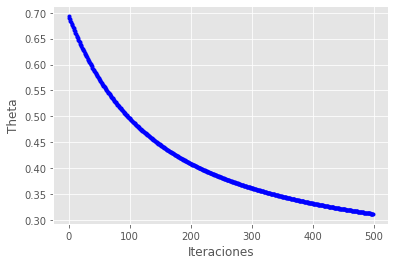

In [19]:
learning_rate = 0.02 # ratio de aprendizaje
numero_de_iteraciones = 500
X = np.append(np.ones((filas, 1)), puntuaciones_estandarizadas, axis=1) 
y = resultado.reshape(filas, 1)

theta_0 = np.zeros((columnas + 1, 1))

theta, costes = funcion_descenso_gradiente(X, y, theta_0, learning_rate, numero_de_iteraciones)

print(theta)
print(costes[-1])

plt.plot(costes, 'b.')
plt.xlabel("Número de iteraciones")
plt.ylabel("Theta");

### Con 1000 iteraciones y learning rate = 0.5

[[1.68576361]
 [3.92304937]
 [3.65765622]]
0.20352871138544498


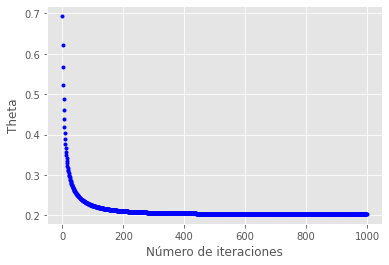

In [24]:
learning_rate = 0.5 # ratio de aprendizaje
numero_de_iteraciones = 1000
X = np.append(np.ones((filas, 1)), puntuaciones_estandarizadas, axis=1) 
y = resultado.reshape(filas, 1)

theta_0 = np.zeros((columnas + 1, 1))

theta, costes = funcion_descenso_gradiente(X, y, theta_0, learning_rate, numero_de_iteraciones)

print(theta)
print(costes[-1])

plt.plot(costes, 'b.')
plt.xlabel("Número de iteraciones")
plt.ylabel("Theta");

## Referencias

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1